### We will learn pandas with an example

In [2]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [3]:
import pandas as pd

In [5]:
counts = pd.read_csv('datasets/BicycleWeather.csv')
print(counts.shape)
counts.head(2)

(1340, 26)


,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120101,0,0,0,128,50,47,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120102,109,0,0,106,28,45,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999


In [6]:
weather = pd.read_csv('datasets/FremontBridge.csv')
print(weather.shape)
weather.head(2)

(102947, 4)


,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0


###### Both have date columns let's parse them and also make them index

In [7]:
counts = pd.read_csv('datasets/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather = pd.read_csv('datasets/FremontBridge.csv', index_col='Date', parse_dates=True)

counts.head(2)

C:\Users\mgupta70\AppData\Local\Temp\ipykernel_20836\786459543.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather = pd.read_csv('datasets/FremontBridge.csv', index_col='Date', parse_dates=True)


,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999


In [8]:
weather.head(2)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0


In [11]:
weather.index

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-06-30 14:00:00', '2024-06-30 15:00:00',
               '2024-06-30 16:00:00', '2024-06-30 17:00:00',
               '2024-06-30 18:00:00', '2024-06-30 19:00:00',
               '2024-06-30 20:00:00', '2024-06-30 21:00:00',
               '2024-06-30 22:00:00', '2024-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=102947, freq=None)

In [18]:
# Find daily total bike counts

## get daily data for each location ( as sum along each column at frequency of Daily)
daily = counts.resample('d').sum(); print(daily.shape) # in this case it is same as counts because counts is a df with daily data

## Make a new column to sum up all the bike counts for all columns along each row
daily['Total'] = daily.sum(axis = 1); print(daily.shape)

## keep only 'Total' column
daily = daily[['Total']]

daily.head(2)

(1340, 25)


TypeError: can only concatenate str (not "int") to str

In [21]:
# drop cols containing strings

## find columns of object type
cats = counts.select_dtypes(include = 'object').columns 
print('cats - ', cats)

## drop column (axis = 1)
counts.drop(cats, axis=1,  inplace = True); print(counts.shape)

cats -  Index(['STATION', 'STATION_NAME'], dtype='object')
(1340, 23)


In [22]:
# now we can get daily bike count

## get counts for each day
daily = counts.resample('d').sum()
## get total for each day
daily['Total'] = daily.sum(axis=1)
## remove other columns
daily = daily[['Total']]; print(daily.shape)
daily.head(2)

(1340, 1)


,Total
DATE,
2012-01-01,-119371
2012-01-02,-99010


-negative value means we check the data because count cannot be less than 0. Hence, upon checking we see that -9999 might reflect missing value. May be replace it with zero.


In [28]:
# replace all -999 with 0
counts.replace(-9999, 0, inplace=True)

# now we can get daily bike count

## get counts for each day
daily = counts.resample('d').sum()
## get total for each day
daily['Total'] = daily.sum(axis=1)
## remove other columns
daily = daily[['Total']]; print(daily.shape)
daily.head(2)

(1340, 1)


,Total
DATE,
2012-01-01,617
2012-01-02,980


In [32]:
## understanding time series index
daily.index.dayofweek

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
      dtype='int32', name='DATE', length=1340)

In [33]:
daily.index.dayofweek == 1

array([False, False,  True, ..., False, False,  True])

In [37]:
(daily.index.dayofweek == 1).astype(float), ((daily.index.dayofweek == 1).astype(float)).shape

(array([0., 0., 1., ..., 0., 0., 1.]), (1340,))

In [38]:
# make cols of days of week

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(len(days)):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
    
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
DATE,,,,,,,,
2012-01-01,617,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-01-02,980,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# use join and add binary column of Federal holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [41]:
holiday_series = pd.Series(1, index=holidays, name = 'holiday')
holiday_series

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
2012-09-03    1
2012-10-08    1
2012-11-12    1
2012-11-22    1
2012-12-25    1
2013-01-01    1
2013-01-21    1
2013-02-18    1
2013-05-27    1
2013-07-04    1
2013-09-02    1
2013-10-14    1
2013-11-11    1
2013-11-28    1
2013-12-25    1
2014-01-01    1
2014-01-20    1
2014-02-17    1
2014-05-26    1
2014-07-04    1
2014-09-01    1
2014-10-13    1
2014-11-11    1
2014-11-27    1
2014-12-25    1
2015-01-01    1
2015-01-19    1
2015-02-16    1
2015-05-25    1
2015-07-03    1
2015-09-07    1
2015-10-12    1
2015-11-11    1
2015-11-26    1
2015-12-25    1
2016-01-01    1
Name: holiday, dtype: int64

In [43]:
# join with daily
daily = daily.join(holiday_series)
daily['holiday'].fillna(0, inplace = True)
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
DATE,,,,,,,,,
2012-01-01,617,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-01-02,980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='DATE'>

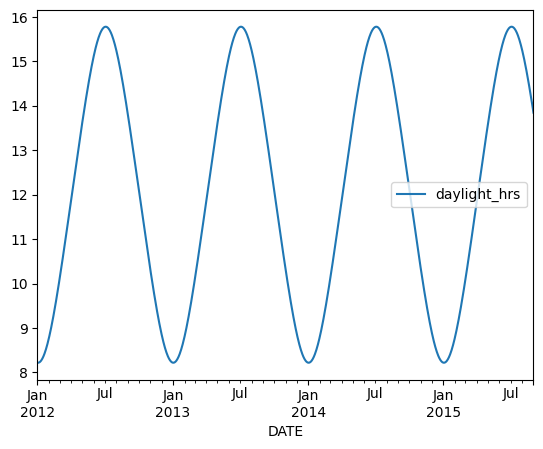

In [55]:
## add daylight hours column
import numpy as np
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (pd.to_datetime(date) - pd.to_datetime(2000-12-21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

# method-1: daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
# method-2: daily['daylight_hrs'] = hours_of_daylight(date = daily.index).values

daily['daylight_hrs'] = hours_of_daylight(date = daily.index).values
daily[['daylight_hrs']].plot()

In [56]:
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
DATE,,,,,,,,,,
2012-01-01,617,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.220433
2012-01-02,980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.219065


In [63]:
is_weekend = ((daily.Sun==1) | (daily.Sat==1)).astype(int)
is_weekend

DATE
2012-01-01    1
2012-01-02    0
2012-01-03    0
2012-01-04    0
2012-01-05    0
             ..
2015-08-28    0
2015-08-29    1
2015-08-30    1
2015-08-31    0
2015-09-01    0
Freq: D, Length: 1340, dtype: int32

In [64]:
daily['is_weekend'] = is_weekend
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,is_weekend
DATE,,,,,,,,,,,
2012-01-01,617,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.220433,1
2012-01-02,980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.219065,0


In [66]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,is_weekend,annual
DATE,,,,,,,,,,,,
2012-01-01,617,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.220433,1,0.00000
2012-01-02,980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.219065,0,0.00274


In [68]:
cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
       'daylight_hrs', 'is_weekend', 'annual']
X = daily[cols]
y = daily['Total']

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

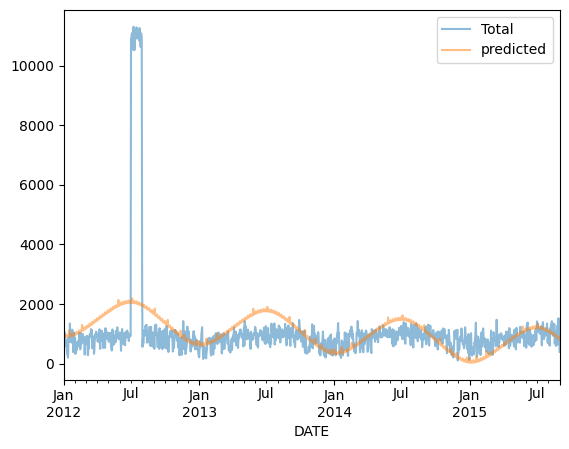

In [70]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [71]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon            -450.406869
Tue            -504.551110
Wed            -509.145417
Thu            -503.243341
Fri            -502.887054
Sat            -158.128807
Sun            -135.403122
holiday         150.068994
daylight_hrs    170.522988
is_weekend     -293.531929
annual         -287.149635
dtype: float64